# This notebook will be mainly used for Capstone Project 

### Business Problem

Customer approached us to identify a suitable Neighbourhood in Toronto to start his Restaurant Business. Customer also wants to know the kind of restaurant that he can start with.

As part of this project ,we are proposing the client the best Neighbourhood / locality where (s)he can start a restaurant. We are also providing the 10 most type of restaurant preferences in particular locality. This will help the customer to make a decision on where and what kind of restaurant can be started.

In [1]:
# Importing required Packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
!pip install folium

     |████████████████████████████████| 92kB 11.5MB/s eta 0:00:01


### DATA

To start with , Using Webscrapping technique, we have collected postal codes of Toronto from Wikipedia. And then their longitude and latitude of the postal codes. 
Using those longitudes and latitudes , we could identify the venues around these locations.
As the objective is to identify the restaurants, we filtered out the restaurants from the venue categories.

### Methodology

In this project we will put our efforts on detecting areas of Toronto where we have restaurants within the radius of 500M,and identify the type of restaurants. We will also arrange them in preferential order.

In first step we have collected the required data: location and type (category) of every restaurant within 500m from Toronto. We have also identified restaurants (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of 'restaurant density' across different neighbourhoods of Toronto

In third and final step we will focus on most promising areas. we will take into consideration locations preferential restaurants in radius of 500 meters.


In [2]:
# Connecting to the URL and extracting the data
URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
r = requests.get(URL)
soup = BeautifulSoup(r.content,'html.parser')
#table = soup.find('tbody tr')
table = soup.select('.wikitable tbody tr') # extracting the particular data
ls1=list()
for i in range(len(table)):
    ls1.append(table[i].text.split('\n')) # Splitting the data and storing it in Dataframe
df=pd.DataFrame(ls1,columns=['First','Postcode','Borough','Neighbourhood','Last'])
df.describe
df.drop(['Last'],axis=1,inplace=True)
df.drop(['First'],axis=1,inplace=True)
df.set_index(['Postcode'])
df.drop([0],axis=0,inplace=True)
df.shape

(288, 3)

In [3]:
df1=pd.DataFrame(columns=['Postcode', 'Borough', 'Neighbourhood'])
df1 = df[df.Borough !=  'Not assigned'] # Not assigned rows in Borough are excluded

In [4]:
#grouping by neighbourhood 
df1 = df1.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df1.head(5)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [5]:
# Identifying Neighbourhood having "Not assigned" values and replacing them with Borough
for i in range(len(df1)):
    if(df1.iloc[i].Neighbourhood=='Not assigned'):
        df1.iloc[i].Neighbourhood = df1.iloc[i].Borough

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
df1.shape
df1.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
# The code was removed by Watson Studio for sharing.

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
df_final = pd.merge(df1, df_data_0, on='Postcode')

In [9]:
df_final.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [10]:
# Install required Packages
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
df_toronto = df_final[df_final['Borough'].str.contains("Toronto")].reset_index() # Select Borough which contains Toronto
address = 'Toronto, CA'
#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
# print(df_toronto.shape)
# print(df_toronto.head())
longitude = -79.3832
latitude = 43.6532
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))
df_toronto.head()

The geograpical coordinate of Toronto City are 43.6532, -79.3832.


,index,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [11]:
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
#add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
display(map_toronto)

In [12]:
df_toronto.loc[0, 'Neighbourhood']
df_toronto.head()

,index,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [13]:
neighbourhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = df_toronto.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [14]:
#Now, let's get the top 100 venues that are in The Beaches within a radius of 500 meters
limit=100
radius =500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    'X', 
    'X', 
    20160805, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    limit)

In [15]:
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5dc404b22376dc002cdff8a4'}, 'response': {'headerLocation': 'The Beaches', 'headerFullLocation': 'The Beaches, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.680857404499996, 'lng': -79.28682091449052}, 'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd461bc77b29c74a07d9282', 'name': 'Glen Manor Ravine', 'contact': {}, 'location': {'address': 'Glen Manor', 'crossStreet': 'Queen St.', 'lat': 43.67682094413784, 'lng': -79.29394208780985, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67682094413784, 'lng': -79.29394208780985}], 'distance': 89, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Glen Manor (Queen S

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
#Now we are ready to clean the json and structure it into a *pandas* dataframe.
from pandas.io.json import json_normalize 
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

,reasons.count,reasons.items,referralId,venue.beenHere.count,venue.beenHere.lastCheckinExpiredAt,venue.beenHere.marked,venue.beenHere.unconfirmedCount,venue.categories,venue.hereNow.count,venue.hereNow.groups,...,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.stats.checkinsCount,venue.stats.tipCount,venue.stats.usersCount,venue.stats.visitsCount,venue.venuePage.id,venue.verified
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bd461bc77b29c74a07d9282-0,0,0,False,0,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",0,[],...,ON,Glen Manor Ravine,0,[],0,0,0,0,NaN,False
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ad4c062f964a52011f820e3-1,0,0,False,0,"[{'id': '50aa9e744b90af0d42d5de0e', 'name': 'H...",0,[],...,ON,The Big Carrot Natural Food Market,0,[],0,0,0,0,75150878,True
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b8daea1f964a520480833e3-2,0,0,False,0,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],...,ON,Grover Pub and Grub,0,[],0,0,0,0,NaN,False
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4df91c4bae60f95f82229ad5-3,0,0,False,0,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",0,[],...,ON,Upper Beaches,0,[],0,0,0,0,NaN,False


In [18]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [20]:
CLIENT_ID='X'
CLIENT_SECRET='XX' 
VERSION='20160805'

In [21]:
#Repeat the same for all the neighbourhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

          # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )



The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [23]:
print(toronto_venues.shape)
toronto_venues.head(10)

(1685, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
7,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
8,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West, Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677827,-79.350569,Greek Restaurant


In [98]:
#Let's check how many venues were returned for each neighbourhood
toronto_venues.groupby('Neighbourhood').count()
# Creating new Dataframe with category  Restaurant(s).
df_rest = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')]
df_rest.head(10)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West, Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677827,-79.350569,Greek Restaurant
13,"The Danforth West, Riverdale",43.679557,-79.352188,7 Numbers,43.677062,-79.353934,Italian Restaurant
16,"The Danforth West, Riverdale",43.679557,-79.352188,Alexandros,43.678304,-79.349486,Greek Restaurant
20,"The Danforth West, Riverdale",43.679557,-79.352188,Rikkochez,43.677267,-79.353274,Restaurant
24,"The Danforth West, Riverdale",43.679557,-79.352188,Athen's Pastries,43.678166,-79.348927,Greek Restaurant
27,"The Danforth West, Riverdale",43.679557,-79.352188,Christina's On The Danforth,43.678240,-79.349185,Greek Restaurant
28,"The Danforth West, Riverdale",43.679557,-79.352188,Pan on the Danforth,43.678263,-79.348648,Greek Restaurant


In [99]:
df_rest1 = df_rest
df_rest2 = df_rest1.groupby(['Neighbourhood','Venue Category']).count()

In [100]:
#Analyze Each Neighbourhood
# one hot encoding
toronto_onehot = pd.get_dummies(df_rest[['Venue Category']], prefix="", prefix_sep="")
#toronto_onehot = pd.get_dummies(df_rest, prefix="", prefix_sep="")
#add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = df_rest['Neighbourhood'] 

# #move neighborhood column to the first column
# fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
# toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(10)

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighbourhood
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"The Danforth West, Riverdale"


In [102]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

In [121]:
toronto_group = pd.DataFrame()
toronto_group = toronto_group.append(toronto_grouped)
#toronto_grouped = toronto_grouped.drop(['Neighbourhood Latitude','Neighbourhood Longitude','Venue Latitude','Venue Longitude'],1)
toronto_group.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Adelaide, King, Richmond",0.0,0.103448,0.103448,0.0,0.034483,0.0,0.000000,0.000000,0.034483,...,0.103448,0.034483,0.0,0.103448,0.000000,0.0,0.103448,0.0,0.068966,0.0
1,Berczy Park,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.111111,0.222222,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.111111,0.0
2,"Brockton, Exhibition Place, Parkdale Village",0.0,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,"Cabbagetown, St. James Town",0.0,0.090909,0.000000,0.0,0.000000,0.0,0.090909,0.090909,0.000000,...,0.181818,0.000000,0.0,0.000000,0.090909,0.0,0.090909,0.0,0.000000,0.0


### Results and Discussion

As per my analysis although we have good restaurants in Toronto , there are some areas where preferential of restaurants matter. And we could provide the areas wise preferential restaurants to customer for discussion.

In [122]:
num_top_venues = 5

for hood in toronto_group['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_group[toronto_group['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0     Asian Restaurant   0.1
1      Thai Restaurant   0.1
2  American Restaurant   0.1
3     Sushi Restaurant   0.1
4           Restaurant   0.1


----Berczy Park----
                           venue  freq
0             Seafood Restaurant  0.22
1  Vegetarian / Vegan Restaurant  0.11
2                Thai Restaurant  0.11
3               Greek Restaurant  0.11
4        Comfort Food Restaurant  0.11


----Brockton, Exhibition Place, Parkdale Village----
                     venue  freq
0     Caribbean Restaurant  0.33
1               Restaurant  0.33
2       Italian Restaurant  0.33
3        Afghan Restaurant  0.00
4  New American Restaurant  0.00


----Business Reply Mail Processing Centre 969 Eastern----
                     venue  freq
0     Fast Food Restaurant   0.5
1               Restaurant   0.5
2        Afghan Restaurant   0.0
3  New American Restaurant   0.0
4        Korean Restaurant   0.0


----Cabbagetown, St. Jam

In [123]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_group['Neighbourhood']

for ind in np.arange(toronto_group.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_group.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()
#neighbourhoods_venues_sorted[neighbourhoods_venues_sorted['Neighbourhood']=='Berczy Park']

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",American Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Colombian Restaurant,Gluten-free Restaurant,Latin American Restaurant,Indian Restaurant
1,Berczy Park,Seafood Restaurant,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Eastern European Restaurant,Restaurant,Greek Restaurant,Thai Restaurant,Cajun / Creole Restaurant,Dumpling Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Italian Restaurant,Caribbean Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Dim Sum Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
4,"Cabbagetown, St. James Town",Italian Restaurant,Restaurant,American Restaurant,Thai Restaurant,Taiwanese Restaurant,Indian Restaurant,Caribbean Restaurant,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant


In [124]:
#toronto_grouped = toronto_grouped.drop(['Neighbourhood Latitude','Neighbourhood Longitude','Venue Latitude','Venue Longitude'],1)
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
toronto_group['Neighbourhood'] = le.fit_transform(toronto_group.Neighbourhood.values)
#toronto_grouped.apply(preprocessing.LabelEncoder().fit(toronto_grouped['Neighbourhood']))
toronto_group.head(5)

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0.0,0.103448,0.103448,0.0,0.034483,0.0,0.000000,0.000000,0.034483,...,0.103448,0.034483,0.0,0.103448,0.000000,0.0,0.103448,0.0,0.068966,0.0
1,1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.111111,0.222222,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.111111,0.0
2,2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,4,0.0,0.090909,0.000000,0.0,0.000000,0.0,0.090909,0.090909,0.000000,...,0.181818,0.000000,0.0,0.000000,0.090909,0.0,0.090909,0.0,0.000000,0.0


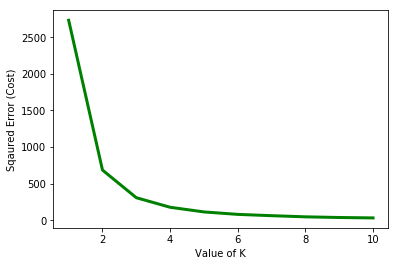

In [108]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
cost =[] 


for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 50) 
    KM.fit(toronto_group) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [125]:
# set number of clusters

kclusters = 10

#toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_group)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
#neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.drop('Cluster Labels',1)
toronto_group.insert(1, 'Cluster Labels', kmeans.labels_)
toronto_group.head()
#toronto_merged = toronto_group

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

#toronto_merged.head() # check the last columns!


,Neighbourhood,Cluster Labels,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,6,0.0,0.103448,0.103448,0.0,0.034483,0.0,0.000000,0.000000,...,0.103448,0.034483,0.0,0.103448,0.000000,0.0,0.103448,0.0,0.068966,0.0
1,1,6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.111111,0.222222,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.111111,0.0
2,2,6,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,3,1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,4,1,0.0,0.090909,0.000000,0.0,0.000000,0.0,0.090909,0.090909,...,0.181818,0.000000,0.0,0.000000,0.090909,0.0,0.090909,0.0,0.000000,0.0


In [143]:
#toronto_group.insert(0,'Neighbourhood',toronto_grouped['Neighbourhood'])

#toronto_group.drop('Neighbourhood',axis=1,inplace=True)
toronto_group.head()
toronto_merged = toronto_group

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_rest.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged.columns

Index(['Neighbourhood', 'Cluster Labels', 'Afghan Restaurant',
       'American Restaurant', 'Asian Restaurant', 'Belgian Restaurant',
       'Brazilian Restaurant', 'Cajun / Creole Restaurant',
       'Caribbean Restaurant', 'Chinese Restaurant', 'Colombian Restaurant',
       'Comfort Food Restaurant', 'Cuban Restaurant', 'Dim Sum Restaurant',
       'Doner Restaurant', 'Dumpling Restaurant',
       'Eastern European Restaurant', 'Ethiopian Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant',
       'French Restaurant', 'German Restaurant', 'Gluten-free Restaurant',
       'Greek Restaurant', 'Hotpot Restaurant', 'Indian Restaurant',
       'Italian Restaurant', 'Japanese Restaurant', 'Korean Restaurant',
       'Latin American Restaurant', 'Malay Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Modern European Restaurant',
       'Molecular Gastronomy Restaurant', 'New American Restaurant',

In [144]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

import matplotlib.cm as cm
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighbourhood Latitude'], toronto_merged['Neighbourhood Longitude'], toronto_merged['Neighbourhood'],toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Conclusion

Purpose of this project was to identify Toronto areas restaurants in order to aid stakeholders in narrowing down the search for optimal location for a new restaurant.